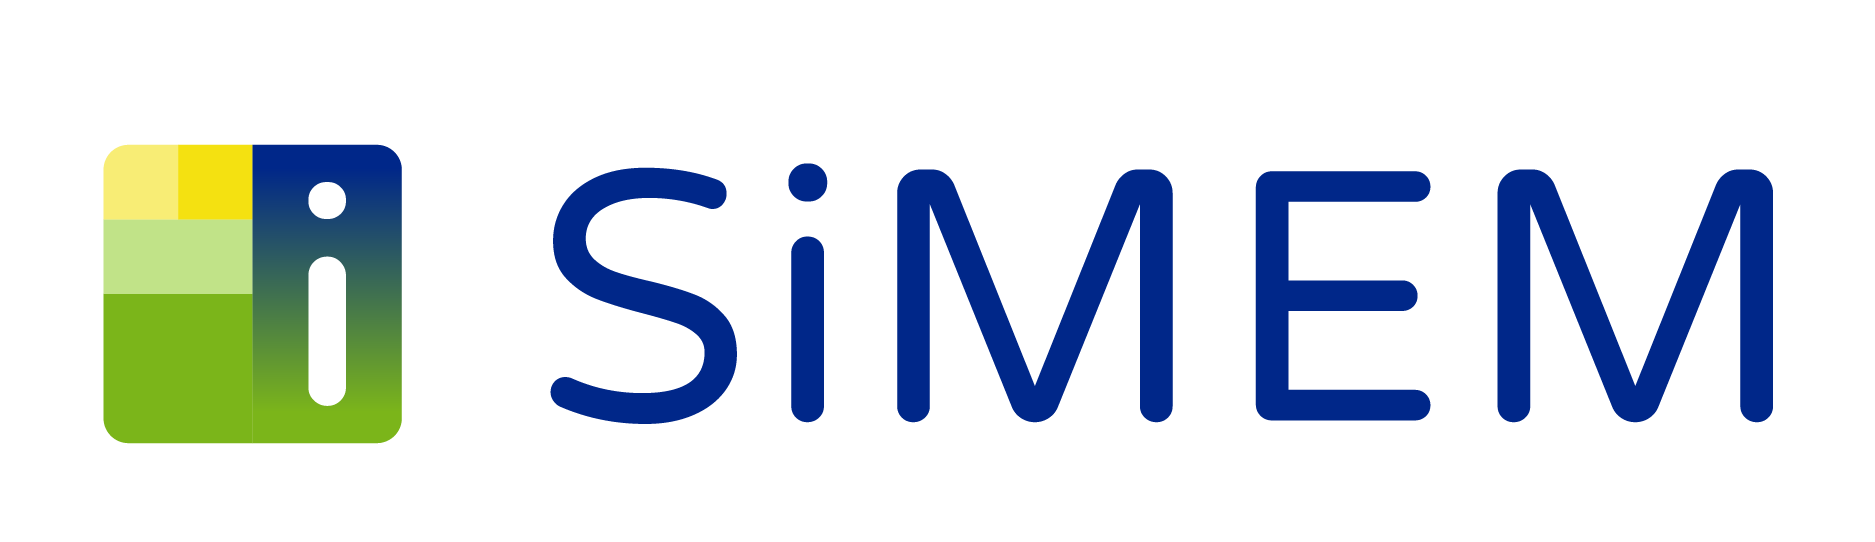

[SiMEM](https://www.simem.co/)

### Caso de uso - Cantidades y precios en contratos de energía del Mercado Mayorista por comercializador

* Presentar el paso a paso de cómo consultar la información de variables asociadas al calculo del MC
* Demostrar cómo se calcula el MC.

### Importación de librerías


In [17]:
from pydataxm import pydataxm
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates

### Consultar información de un conjunto de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
El conjunto a presentar es  [Cantidades y precios en contratos de energía del Mercado Mayorista por comercializador](https://www.simem.co/datadetail/d316478b-b8c0-4050-49ec-08dce7ce0b90) de septiembre 2024.

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

In [18]:
id_dataset = 'd31647'
fecha_inicial = '2024-01-01'
fecha_final = '2024-09-30'
simem = pydataxm.ReadSIMEM()

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [19]:
df_dataset = simem.main(id_dataset, fecha_inicial, fecha_final)
display(df_dataset.head())

,Fecha,CodigoAgenteComprador,TipoMercado,Mecanismo,NormatividadRelacionada,Cantidad,PPP,Version
0,2024-09-30,NRCC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,6.224616e+05,1202.4587,
1,2024-09-30,CASC,Regulado,Por fuera del SICEP,Resolución CREG 101 036 del 2024,3.639368e+05,444.9004,
2,2024-09-30,DLRC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,3.362733e+04,283.3895,
3,2024-09-30,CHCC,Regulado,SICEP,Resolución CREG 130 del 2019,1.239468e+06,312.6710,
4,2024-09-30,RTQC,Regulado,Mecanismos de Comercialización,Resolución MME 40590 del 2019,2.927400e+02,307.1782,


In [20]:
df_dataset = df_dataset.sort_values(by='Fecha')

display(df_dataset)

,Fecha,CodigoAgenteComprador,TipoMercado,Mecanismo,NormatividadRelacionada,Cantidad,PPP,Version
64881,2024-01-01,EDQC,Regulado,Mecanismos de Comercialización,Resolución MME 40590 del 2019,1.299775e+05,223.1814,
64747,2024-01-01,GSYC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,1.320000e+06,278.2125,
64746,2024-01-01,EMSC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,1.900238e+06,295.8055,
64745,2024-01-01,GASC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,5.580159e+06,290.8808,
64744,2024-01-01,ENIC,Regulado,Mecanismos de Comercialización,Resolución MME 40590 del 2019,3.665045e+04,228.2282,
...,...,...,...,...,...,...,...,...
160,2024-09-30,CHCC,Regulado,Antes del SICEP,Resolución CREG 020 del 1996,1.100134e+06,289.9406,
159,2024-09-30,EMEC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,4.549447e+04,306.4109,
158,2024-09-30,DEPC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,5.391638e+04,519.7542,
171,2024-09-30,NMRC,No Regulado,Negociación Bilateral,Resolución CREG 024 del 1995,1.204890e+04,300.5191,


### Interpretación de conjuntos de datos
Cada conjunto de datos tiene diferentes variables, las cuales se encuentran en la sección **ver detalle de variable** de cada conjunto de datos, donde también se pueden ver las características de las columnas que constituyen el conjunto.

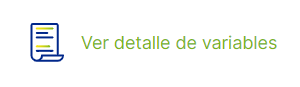

Los dataframes se filtarán para tener los datos necesarios para la visualización, eligiendo el Mecanismo y el tipo de mercado en el que participa.

In [22]:
df_filtrado = df_dataset[
    (df_dataset['TipoMercado'] == 'Regulado') & 
    (df_dataset['Mecanismo'].isin(['SICEP', 'Antes del SICEP']))
]

df_filtrado = df_filtrado[['Fecha', 'Cantidad', 'PPP']]

display(df_filtrado)

,Fecha,Cantidad,PPP
64746,2024-01-01,1.900238e+06,295.8055
64742,2024-01-01,9.110833e+06,289.0986
64737,2024-01-01,1.142918e+05,479.0094
64735,2024-01-01,6.780503e+05,284.2779
64734,2024-01-01,1.110637e+06,286.8110
...,...,...,...
168,2024-09-30,1.951217e+05,333.0614
167,2024-09-30,1.342000e+03,305.6264
164,2024-09-30,3.922352e+05,282.0550
162,2024-09-30,2.643366e+06,289.9444


### Manipulación de datos
El siguiente paso es seleccionar solamente la información relevante para el análisis. Los pasos a realizar para preparar la información son:
- Se realiza el cálculo del Dinero
- El calculo del MC se realiza de forma mensual por lo que se procede a realizar la suma por mes de Cantidad y Dinero.

In [25]:
df_filtrado['Dinero'] = df_filtrado['Cantidad'] * df_filtrado['PPP']

df_filtrado = df_filtrado[['Fecha', 'Cantidad', 'Dinero']]

display(df_filtrado)

,Fecha,Cantidad,Dinero
64746,2024-01-01,1.900238e+06,5.621009e+08
64742,2024-01-01,9.110833e+06,2.633929e+09
64737,2024-01-01,1.142918e+05,5.474687e+07
64735,2024-01-01,6.780503e+05,1.927547e+08
64734,2024-01-01,1.110637e+06,3.185429e+08
...,...,...,...
168,2024-09-30,1.951217e+05,6.498750e+07
167,2024-09-30,1.342000e+03,4.101506e+05
164,2024-09-30,3.922352e+05,1.106319e+08
162,2024-09-30,2.643366e+06,7.664292e+08


In [26]:
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])

df_summary = df_filtrado.groupby(df_filtrado['Fecha'].dt.to_period('M')).agg({
    'Cantidad': 'sum',
    'Dinero': 'sum'
}).reset_index()

df_summary['Fecha'] = df_summary['Fecha'].dt.to_timestamp()

display(df_summary)

,Fecha,Cantidad,Dinero
0,2024-01-01,3.101211e+09,9.093390e+11
1,2024-02-01,2.922162e+09,8.623254e+11
2,2024-03-01,3.232812e+09,1.001395e+12
3,2024-04-01,3.179973e+09,9.949584e+11
4,2024-05-01,3.389157e+09,1.045252e+12
5,2024-06-01,3.363334e+09,1.050944e+12
6,2024-07-01,3.537844e+09,1.107135e+12
7,2024-08-01,3.470089e+09,1.062730e+12
8,2024-09-01,3.295765e+09,1.034466e+12


### Cálculo del MC
Ahora se realiza el cálculo del MC por mes, el cual es Dinero/Cantidad

In [28]:
df_summary['MC'] = df_summary['Dinero'] / df_summary['Cantidad']

df_MC = df_summary[['Fecha', 'Cantidad', 'Dinero', 'MC']]

display(df_MC)

,Fecha,Cantidad,Dinero,MC
0,2024-01-01,3.101211e+09,9.093390e+11,293.220620
1,2024-02-01,2.922162e+09,8.623254e+11,295.098384
2,2024-03-01,3.232812e+09,1.001395e+12,309.759808
3,2024-04-01,3.179973e+09,9.949584e+11,312.882696
4,2024-05-01,3.389157e+09,1.045252e+12,308.410599
5,2024-06-01,3.363334e+09,1.050944e+12,312.470973
6,2024-07-01,3.537844e+09,1.107135e+12,312.940476
7,2024-08-01,3.470089e+09,1.062730e+12,306.254460
8,2024-09-01,3.295765e+09,1.034466e+12,313.877346
